# Enunciado

Utilizando o dataset do Spotify construa um modelo sequencial ou funcional no Keras para
fazer a classificação desse dataset.

## Dicas:
 - Tente calibrar a quantidade de camadas e neurônios a fim de atingir uma acurácia superior a 74%;
 - Tente utilizar ó dropout a fim de evitar eventual overfitting.
 - Aplique os pré-processamentos necessários.
 - Apresente a evolução do conjunto de treino e validação.
 - Apresente a acurácia do conjunto de testes.
 - Apresente a configuração (estrutura) da rede neural.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, AveragePooling1D, BatchNormalization, Activation, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import optimizers

np.random.seed(0)

In [2]:
data = pd.read_csv("../data/spotify.csv")

In [3]:
data.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
data['danceXacousti']= data['acousticness'] * data['danceability']

In [7]:
#print(data['time_signature'].value_counts())

4.0    1891
3.0      93
5.0      32
1.0       1
Name: time_signature, dtype: int64


In [8]:
#data = data.drop(data[(data['time_signature'] == 1.0)].index)

In [9]:
X = data.drop(["target", "song_title", "artist", "id"], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled, columns = X.columns)

y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(X_normalized.values, y.values, test_size=0.1, random_state=5)

In [10]:
len(x_train), len(x_test)

(1814, 202)

In [11]:
percent = 0.1
amount = int(len(x_train)*percent)
(final_x, x_valid) = x_train[amount:], x_train[:amount]
(final_y, y_valid) = y_train[amount:], y_train[:amount]

In [12]:
model = Sequential()
model.add(Dense(64, input_dim=final_x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [13]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [14]:
result = model.fit(final_x, final_y, epochs=25, batch_size=18, validation_data=(x_valid, y_valid), verbose=1, shuffle=False, use_multiprocessing=True)

Epoch 1/23
91/91 [==============================] - 1s 13ms/step - loss: 0.6907 - accuracy: 0.5156 - val_loss: 0.6650 - val_accuracy: 0.6575
Epoch 2/23
91/91 [==============================] - 1s 12ms/step - loss: 0.6680 - accuracy: 0.5799 - val_loss: 0.6384 - val_accuracy: 0.5801
Epoch 3/23
91/91 [==============================] - 1s 12ms/step - loss: 0.6467 - accuracy: 0.6197 - val_loss: 0.6110 - val_accuracy: 0.6851
Epoch 4/23
91/91 [==============================] - 1s 12ms/step - loss: 0.6277 - accuracy: 0.6754 - val_loss: 0.5995 - val_accuracy: 0.7072
Epoch 5/23
91/91 [==============================] - 1s 13ms/step - loss: 0.6108 - accuracy: 0.6816 - val_loss: 0.5961 - val_accuracy: 0.7072
Epoch 6/23
91/91 [==============================] - 1s 13ms/step - loss: 0.6002 - accuracy: 0.7061 - val_loss: 0.5863 - val_accuracy: 0.7072
Epoch 7/23
91/91 [==============================] - 1s 13ms/step - loss: 0.5905 - accuracy: 0.7036 - val_loss: 0.6047 - val_accuracy: 0.6851
Epoch 8/23
91

In [15]:
score = model.evaluate(x_test, y_test, batch_size=18)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

12/12 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.7327
Test loss:  0.5355600118637085
Test accuracy:  0.7326732873916626


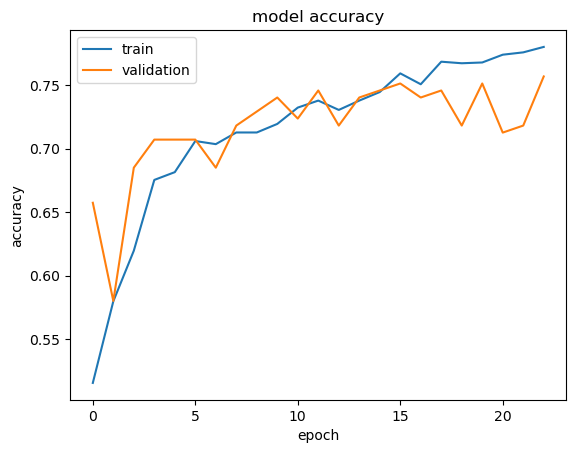

In [16]:
plt.figure(1)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
plot_model(model, to_file='spotify.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
